In [64]:
# Cell: imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline

# Ensure plots look good in notebook
%matplotlib inline
sns.set_style("whitegrid")

# Create visuals folder path
VIS_DIR = "Milestone_2_Clustering/visualizations"
os.makedirs(VIS_DIR, exist_ok=True)

In [65]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\Chandana N\PycharmProjects\studyTrack_AI_StudentRecommender\Milestone1\data\student-mat.csv",sep=';')
df2=pd.read_csv(r"C:\Users\Chandana N\PycharmProjects\studyTrack_AI_StudentRecommender\Milestone1\data\student-por.csv",sep=';')
print("Dataset1 shape",df1.shape)
print("Dataset2 shape",df2.shape)

Dataset1 shape (395, 33)
Dataset2 shape (649, 33)


In [17]:
# Standardize column names (optional, avoid case/spaces mismatch)
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

# Keep only common columns
common_cols = df1.columns.intersection(df2.columns)
df1 = df1[common_cols]
df2 = df2[common_cols]

# Concatenate
combined_df = pd.concat([df1, df2], ignore_index=True)
print(combined_df.shape)

(1044, 1)


In [66]:
print("Shape:", combined_df.shape)
display(combined_df.describe())
display(combined_df.info())
# Check nulls
display(combined_df.isnull().sum().sort_values(ascending=False).head(20))

Shape: (1044, 33)


,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   pstatus     1044 non-null   object
 6   medu        1044 non-null   int64 
 7   fedu        1044 non-null   int64 
 8   mjob        1044 non-null   object
 9   fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

None

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
dtype: int64

In [67]:
print(combined_df.columns)
combined_df.columns=combined_df.columns.str.strip()
combined_df.columns=combined_df.columns.str.lower()

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')


In [60]:
combined_df=pd.concat([df1,df2],ignore_index=True)
combined_df.columns=combined_df.columns.str.strip().str.lower()
print(combined_df.head())
print(combined_df.columns.tolist())

  school sex  age address famsize pstatus  medu  fedu     mjob      fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  dalc  walc health absences  g1  g2  g3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob'

In [68]:
features = ['age', 'studytime', 'failures', 'absences', 'g1', 'g2', 'g3']
X = combined_df[features]
print(X.head())

   age  studytime  failures  absences  g1  g2  g3
0   18          2         0         6   5   6   6
1   17          2         0         4   5   5   6
2   15          2         3        10   7   8  10
3   15          3         0         2  15  14  15
4   16          2         0         4   6  10  10


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

combined_df['PCA1'] = X_pca[:,0]
combined_df['PCA2'] = X_pca[:,1]

In [73]:
from sklearn.cluster import KMeans

# Determine optimal number of clusters (optional: elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(X_scaled)

In [74]:
cluster_summary = combined_df.groupby('Cluster')[features].mean()
print(cluster_summary)

               age  studytime  failures  absences         g1         g2  \
Cluster                                                                   
0        16.661972   2.318310  0.042254  3.016901  14.332394  14.529577   
1        17.631285   1.709497  1.268156  6.631285   7.731844   6.988827   
2        16.452941   1.819608  0.066667  4.650980  10.264706  10.454902   

                g3  
Cluster             
0        14.949296  
1         5.921788  
2        10.733333  


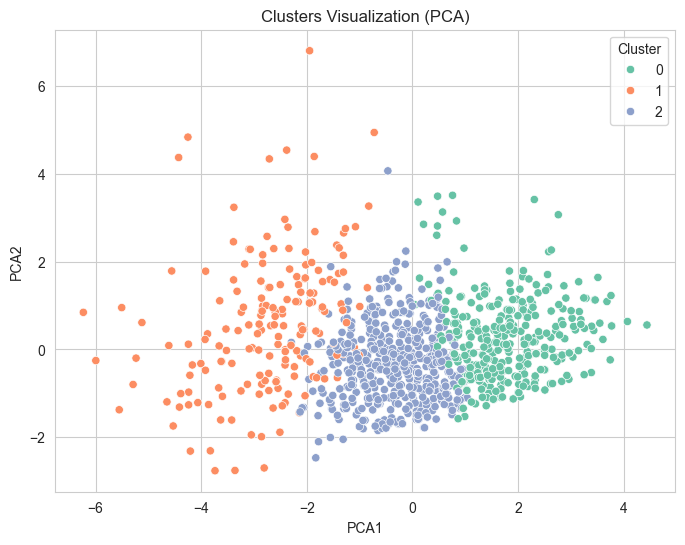

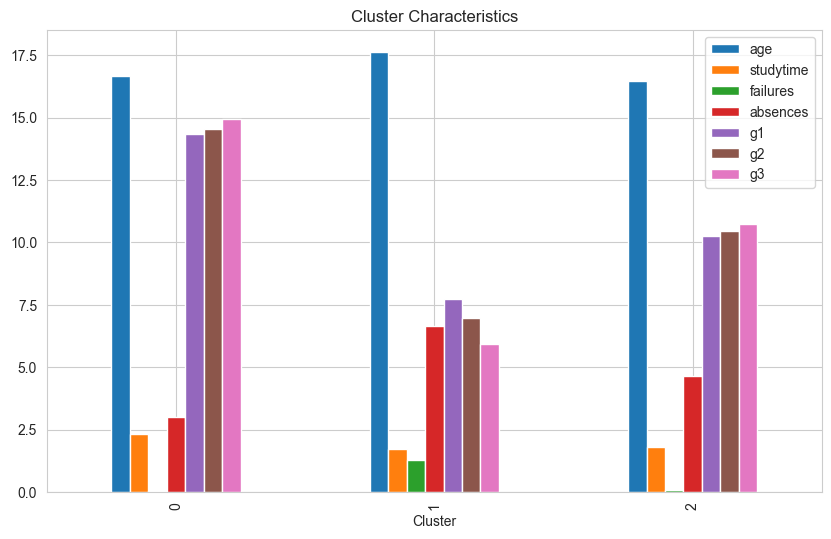

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot using PCA
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Clusters Visualization (PCA)')
plt.show()

# Cluster characteristics
cluster_summary.plot(kind='bar', figsize=(10,6))
plt.title('Cluster Characteristics')
plt.show()



In [86]:
numeric_df = combined_df.select_dtypes(include=['int64', 'float64'])
print(numeric_df.columns.tolist())

['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3', 'PCA1', 'PCA2']


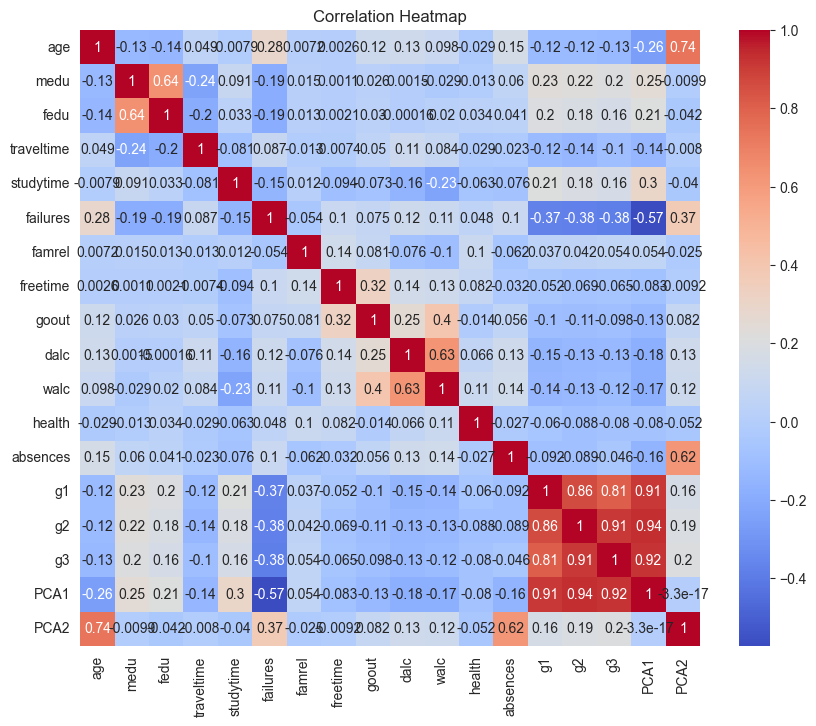

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Milestone_2_Clustering/visualizations/correlation_heatmap.png')
plt.show()

In [50]:
combined_df['Cluster'].value_counts()

Cluster
2    510
0    355
1    179
Name: count, dtype: int64

In [51]:
cluster_summary = combined_df.groupby('Cluster')[features].mean()
print(cluster_summary)

               age  studytime  failures  absences         g1         g2  \
Cluster                                                                   
0        16.661972   2.318310  0.042254  3.016901  14.332394  14.529577   
1        17.631285   1.709497  1.268156  6.631285   7.731844   6.988827   
2        16.452941   1.819608  0.066667  4.650980  10.264706  10.454902   

                g3  
Cluster             
0        14.949296  
1         5.921788  
2        10.733333  


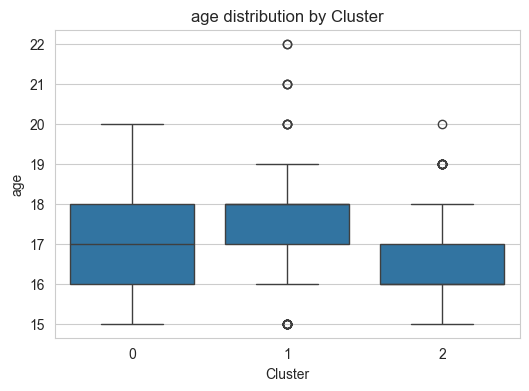

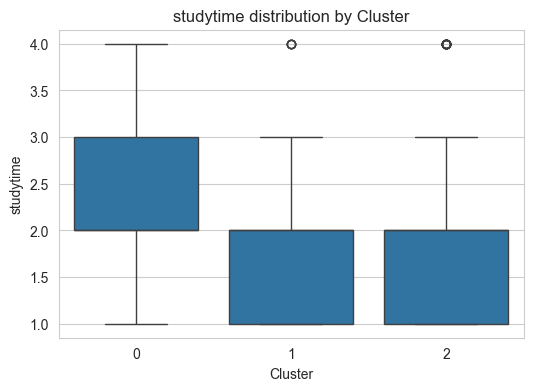

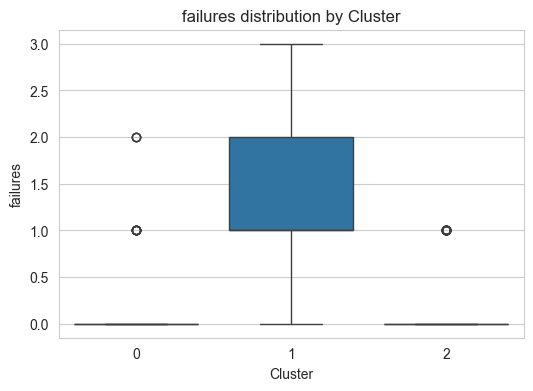

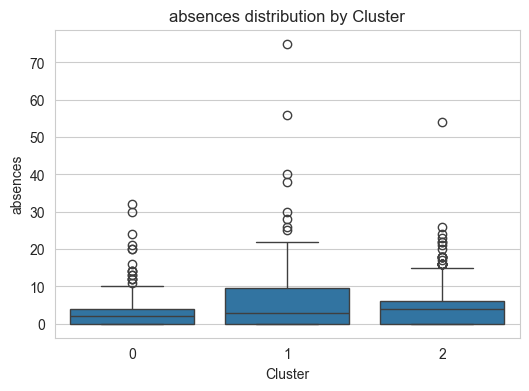

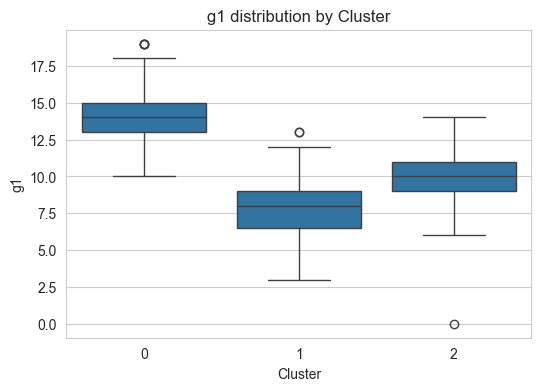

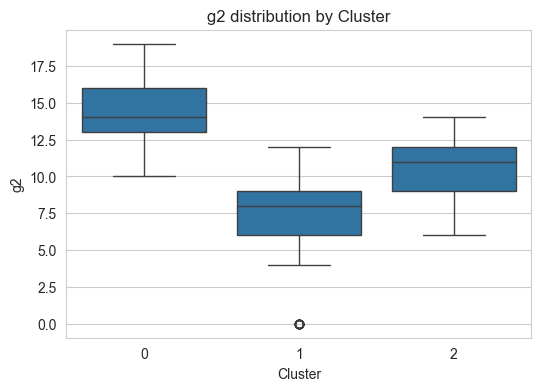

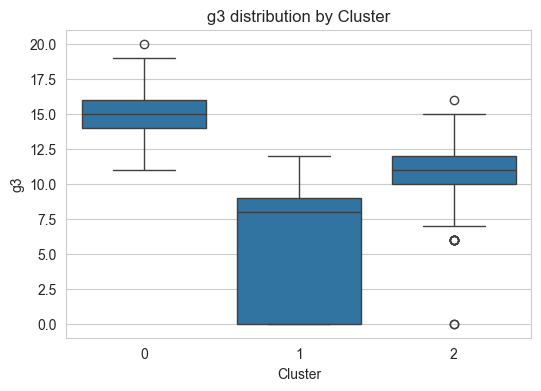

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Cluster', y=feature, data=combined_df)
    plt.title(f'{feature} distribution by Cluster')
    plt.show()

In [54]:
combined_df.to_csv('combined_df_with_clusters.csv', index=False)